In [5]:
import numpy as np
import if2 as if2
from scipy.stats import norm
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
FXspot = 4.3440
T = 92 / 365
df_pln_T = 0.99868
df_eur_T = 0.99373
prem_incl = "std"
spot_fwd = "fwd"



In [7]:
smile = pd.read_excel('ImpVol.xlsx', index_col='Tenor')

In [8]:
smile[['ATM', '25RR', '10RR', '25BF', '10BF']] /= 100

In [9]:
smile['10P'] = smile['ATM'] - smile['10RR'] / 2 + smile['10BF']
smile['25P'] = smile['ATM'] - smile['25RR'] / 2 + smile['25BF']
smile['10C'] = smile['ATM'] + smile['10RR'] / 2 + smile['10BF']
smile['25C'] = smile['ATM'] + smile['25RR'] / 2 + smile['25BF']

In [10]:
smile

,Date,Days,ATM,25RR,10RR,25BF,10BF,10P,25P,10C,25C
Tenor,,,,,,,,,,,
ON,2024-03-06,1,0.0403,0.0038,0.0075,0.0012,0.0044,0.04095,0.03960,0.04845,0.04340
1W,2024-03-12,7,0.0452,0.0034,0.0068,0.0013,0.0049,0.04670,0.04480,0.05350,0.04820
2W,2024-03-19,14,0.0479,0.0052,0.0102,0.0015,0.0054,0.04820,0.04680,0.05840,0.05200
1M,2024-04-04,30,0.0497,0.0065,0.0126,0.0015,0.0057,0.04910,0.04795,0.06170,0.05445
2M,2024-05-02,58,0.0526,0.0087,0.0164,0.0017,0.0064,0.05080,0.04995,0.06720,0.05865
3M,2024-06-05,92,0.0534,0.0093,0.0178,0.0021,0.0071,0.05160,0.05085,0.06940,0.06015
6M,2024-09-05,184,0.0567,0.0124,0.0234,0.0027,0.0081,0.05310,0.05320,0.07650,0.06560
9M,2024-12-05,275,0.0589,0.0131,0.0244,0.0033,0.0096,0.05630,0.05565,0.08070,0.06875
1Y,2025-03-05,365,0.0595,0.0135,0.0255,0.0035,0.0098,0.05655,0.05625,0.08205,0.06975


In [11]:
vols = smile.loc['3M', ['ATM', '25P', '25C']]

In [12]:
strike_25p = if2.StrikeFromDelta(spot_fwd, prem_incl, -1, -0.25, FXspot, vols['25P'],
                            df_pln_T, df_eur_T, T)
strike_atm = if2.StrikeFromDelta(spot_fwd, prem_incl, 1, 0.5, FXspot, vols['ATM'],
                            df_pln_T, df_eur_T, T)
strike_25c = if2.StrikeFromDelta(spot_fwd, prem_incl, 1, 0.25, FXspot, vols['25C'],
                            df_pln_T, df_eur_T, T)

In [13]:
strike_25p, strike_atm, strike_25c

(4.25006108109276, 4.324022443800719, 4.413425557593935)

In [14]:
value_25p_bs = if2.BS_value(FXspot, df_eur_T, df_pln_T, T, vols['ATM'], -1, strike_25p, 1)
value_25p_bs

0.018424558739856156

In [15]:
value_atm_bs = if2.BS_value(FXspot, df_eur_T, df_pln_T, T, vols['ATM'], 1, strike_atm, 1)
value_atm_bs

0.045404952721152636

In [16]:
value_25c_bs = if2.BS_value(FXspot, df_eur_T, df_pln_T, T, vols['ATM'], 1, strike_25c, 1)
value_25c_bs

0.014641523962009462

In [17]:
value_25p_iv = if2.BS_value(FXspot, df_eur_T, df_pln_T, T, vols['25P'], -1, strike_25p, 1)
value_25p_iv

0.01664990336165606

In [18]:
value_atm_iv = if2.BS_value(FXspot, df_eur_T, df_pln_T, T, vols['ATM'], 1, strike_atm, 1)
value_atm_iv

0.045404952721152636

In [19]:
value_25c_iv = if2.BS_value(FXspot, df_eur_T, df_pln_T, T, vols['25C'], 1, strike_25c, 1)
value_25c_iv

0.019153404772929816

In [20]:
vega_25p = if2.VegaBS(FXspot, vols['25P'], df_pln_T, df_eur_T, strike_25p, T, 1)
vega_atm = if2.VegaBS(FXspot, vols['ATM'], df_pln_T, df_eur_T, strike_atm, T, 1)
vega_25c = if2.VegaBS(FXspot, vols['25C'], df_pln_T, df_eur_T, strike_25c, T, 1)

In [21]:
K = 4.4

In [22]:
vega_K = if2.VegaBS(FXspot, vols['ATM'], df_pln_T, df_eur_T, K, T, 1)

In [23]:
x1_ = ((np.log(K/strike_atm)) * np.log(K/strike_25c)) / (np.log(strike_25p/strike_atm) * np.log(strike_25p/strike_25c))
x2_ = ((np.log(K/strike_25p)) * np.log(K/strike_25c)) / (np.log(strike_atm/strike_25p) * np.log(strike_atm/strike_25c))
x3_ = ((np.log(K/strike_25p)) * np.log(K/strike_atm)) / (np.log(strike_25c/strike_25p) * np.log(strike_25c/strike_atm))

In [24]:
x1_ = ((np.log(K/strike_atm)) * np.log(K/strike_25c)) / (np.log(strike_25p/strike_atm) * np.log(strike_25p/strike_25c))
x2_ = ((np.log(K/strike_25p)) * np.log(K/strike_25c)) / (np.log(strike_atm/strike_25p) * np.log(strike_atm/strike_25c))
x3_ = ((np.log(K/strike_25p)) * np.log(K/strike_atm)) / (np.log(strike_25c/strike_25p) * np.log(strike_25c/strike_atm))
x1 = vega_K / vega_25p * x1_
x2 = vega_K / vega_atm * x2_
x3 = vega_K / vega_25c * x3_

In [25]:
x1_ + x2_ + x3_

1.0000000000000082

In [26]:
x1_ = ((np.log(K/strike_atm)) * np.log(K/strike_25c)) / (np.log(strike_25p/strike_atm) * np.log(strike_25p/strike_25c))
x2_ = ((np.log(K/strike_25p)) * np.log(K/strike_25c)) / (np.log(strike_atm/strike_25p) * np.log(strike_atm/strike_25c))
x3_ = ((np.log(K/strike_25p)) * np.log(K/strike_atm)) / (np.log(strike_25c/strike_25p) * np.log(strike_25c/strike_atm))
x1 = vega_K / vega_25p * x1_
x2 = vega_K / vega_atm * x2_
x3 = vega_K / vega_25c * x3_
oh = x1 * (value_25p_iv - value_25p_bs) + x2 * (value_atm_iv - value_atm_bs) + x3 * (value_25c_iv - value_25c_bs)

In [27]:
value_k_bs = if2.BS_value(FXspot, df_eur_T, df_pln_T, T, vols['ATM'], 1, K, 1)

In [28]:
vv_price = value_k_bs + oh

In [29]:
value_k_bs, oh, vv_price

(0.017749281663331118, 0.003735518417348504, 0.02148480008067962)

In [30]:
oh / value_k_bs

0.21046025907999683

In [31]:
if2.ImpVol(vv_price, 1, FXspot, df_pln_T, df_eur_T, K, T)

0.058631867830583786

In [32]:
def sigma_vv(K, strike_25p, strike_atm, strike_25c, sigma_25p, sigma_atm, sigma_25c):
    x1_ = ((np.log(K/strike_atm)) * np.log(K/strike_25c)) / (np.log(strike_25p/strike_atm) * np.log(strike_25p/strike_25c))
    x2_ = ((np.log(K/strike_25p)) * np.log(K/strike_25c)) / (np.log(strike_atm/strike_25p) * np.log(strike_atm/strike_25c))
    x3_ = ((np.log(K/strike_25p)) * np.log(K/strike_atm)) / (np.log(strike_25c/strike_25p) * np.log(strike_25c/strike_atm))
    return x1_ * sigma_25p + x2_ * sigma_atm + x3_ * sigma_25c

In [33]:
sigma_vv(K, strike_25p, strike_atm, strike_25c, vols['25P'], vols['ATM'], vols['25C'])

0.05888902794684169

In [34]:
K = np.linspace(4.2, 4.6, 100)

In [35]:
sigmas = sigma_vv(K, strike_25p, strike_atm, strike_25c, vols['25P'], vols['ATM'], vols['25C'])

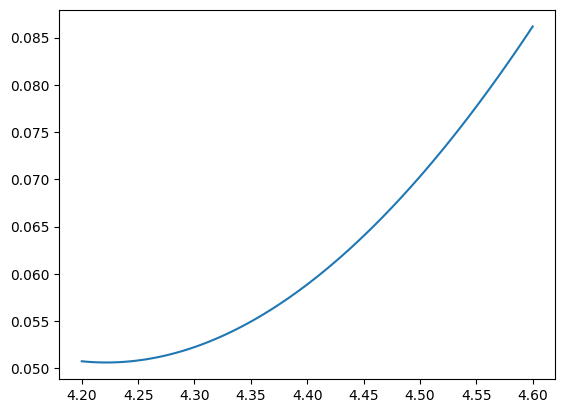

In [36]:
plt.plot(K, sigmas);

In [37]:
deltas = if2.DeltaBS(1, FXspot, sigmas, df_pln_T, df_eur_T, K, T, 1)

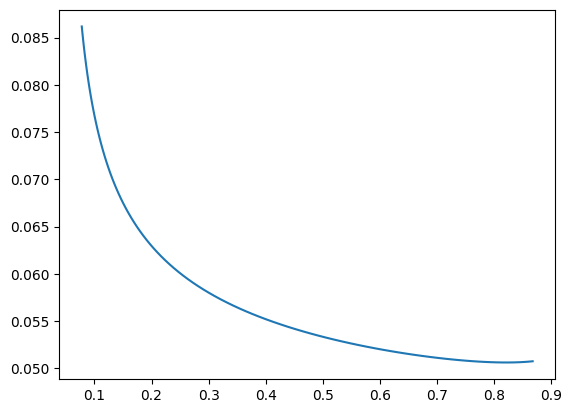

In [38]:
plt.plot(deltas, sigmas);

In [58]:
def vanna_volga(K, deltas, vols, types, df_pln_T, df_eur_T, T, spot_fwd, prem_incl, vol_ATM=None):
    if vol_ATM == None:
        vol_ATM = vols[1]
        
    strike_1 = if2.StrikeFromDelta(spot_fwd, prem_incl, types[0], deltas[0], FXspot, vols[0],
                                df_pln_T, df_eur_T, T)
    strike_2 = if2.StrikeFromDelta(spot_fwd, prem_incl, types[1], deltas[1], FXspot, vols[1],
                                df_pln_T, df_eur_T, T)
    strike_3 = if2.StrikeFromDelta(spot_fwd, prem_incl, types[2], deltas[2], FXspot, vols[2],
                                df_pln_T, df_eur_T, T)
    
    vega_1 = if2.VegaBS(FXspot, vols[0], df_pln_T, df_eur_T, strike_1, T, types[0])
    vega_2 = if2.VegaBS(FXspot, vols[1], df_pln_T, df_eur_T, strike_2, T, types[1])
    vega_3 = if2.VegaBS(FXspot, vols[2], df_pln_T, df_eur_T, strike_3, T, types[2])
    vega_K = if2.VegaBS(FXspot, vol_ATM, df_pln_T, df_eur_T, K, T, 1)
    
    x1_ = ((np.log(K/strike_2)) * np.log(K/strike_3)) / (np.log(strike_1/strike_2) * np.log(strike_1/strike_3))
    x2_ = ((np.log(K/strike_1)) * np.log(K/strike_3)) / (np.log(strike_2/strike_1) * np.log(strike_2/strike_3))
    x3_ = ((np.log(K/strike_1)) * np.log(K/strike_2)) / (np.log(strike_3/strike_1) * np.log(strike_3/strike_2))
    
    x1 = vega_K / vega_1 * x1_
    x2 = vega_K / vega_2 * x2_
    x3 = vega_K / vega_3 * x3_
    
    value_1_bs = if2.BS_value(FXspot, df_eur_T, df_pln_T, T, vol_ATM, 1, strike_1, 1)
    value_2_bs = if2.BS_value(FXspot, df_eur_T, df_pln_T, T, vol_ATM, 1, strike_2, 1)
    value_3_bs = if2.BS_value(FXspot, df_eur_T, df_pln_T, T, vol_ATM, 1, strike_3, 1)
    value_K_bs = if2.BS_value(FXspot, df_eur_T, df_pln_T, T, vol_ATM, 1, K, 1)

    value_1_iv = if2.BS_value(FXspot, df_eur_T, df_pln_T, T, vols[0], 1, strike_1, 1)
    value_2_iv = if2.BS_value(FXspot, df_eur_T, df_pln_T, T, vols[1], 1, strike_2, 1)
    value_3_iv = if2.BS_value(FXspot, df_eur_T, df_pln_T, T, vols[2], 1, strike_3, 1)

    oh = x1 * (value_1_iv - value_1_bs) + x2 * (value_2_iv - value_2_bs) + x3 * (value_3_iv - value_3_bs)
    return oh + value_K_bs

In [61]:
K = np.linspace(4, 4.6)

In [62]:
values = [vanna_volga(k, [-0.25, 0.5, 0.25], vols, [-1, 1, 1], df_pln_T, df_eur_T, T, spot_fwd, prem_incl, vol_ATM=None) for k in K]

C:\Users\unoci\AppData\Local\Temp\ipykernel_14544\2667203718.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  vol_ATM = vols[1]
C:\Users\unoci\AppData\Local\Temp\ipykernel_14544\2667203718.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  strike_1 = if2.StrikeFromDelta(spot_fwd, prem_incl, types[0], deltas[0], FXspot, vols[0],
C:\Users\unoci\AppData\Local\Temp\ipykernel_14544\2667203718.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.il

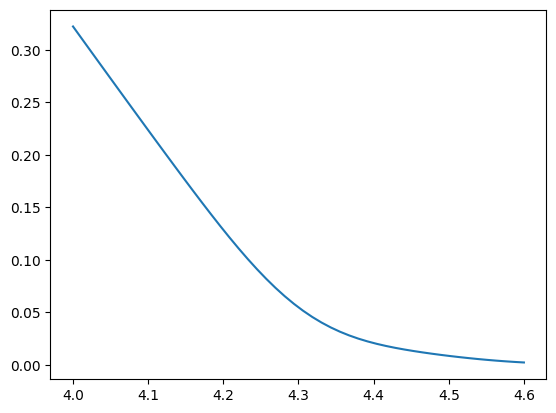

In [63]:
plt.plot(K, values)